# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [74]:
df_spotify_0 = pd.read_csv('/Users/tuva/Documents/DAT200/CAs/CA1/spotify_data/streaminghistory0.csv')

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [75]:
help(pd.DataFrame.head)

Help on function head in module pandas.core.generic:

head(self, n: 'int' = 5) -> 'Self'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator

In [76]:
help(pd.DataFrame.tail)

Help on function tail in module pandas.core.generic:

tail(self, n: 'int' = 5) -> 'Self'
    Return the last `n` rows.
    
    This function returns last `n` rows from the object based on
    position. It is useful for quickly verifying data, for example,
    after sorting or appending rows.
    
    For negative values of `n`, this function returns all rows except
    the first `|n|` rows, equivalent to ``df[|n|:]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    type of caller
        The last `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.head : The first `n` rows of the caller object.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [105]:
df_spotify_0.head() # default is n = 5 

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0


In [78]:
df_spotify_0.tail(10)

,endTime,artistName,trackName,msPlayed
11949,2023-01-02 20:58,Ariana Grande,six thirty,1699.0
11950,2023-01-02 20:58,Leonard Cohen,Thanks for the Dance,19483.0
11951,2023-01-02 20:59,Des Rocs,Used to the Darkness,185.0
11952,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,603.0
11953,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,208.0
11954,2023-01-02 20:59,Kaizers Orchestra,Resistansen,208.0
11955,2023-01-02 20:59,Mr.Kitty,After Dark,101447.0
11956,2023-01-02 20:59,daddy's girl,after dark x sweater weather,301.0
11957,2023-01-02 20:59,daddy's girl,after dark x sweater weather,208.0
11958,2023-01-02 20:59,daddy's girl,after dark x sweater weather,789.0


#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [79]:
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'])
df_spotify_0.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0


#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [80]:
num_artists = df_spotify_0['artistName'].nunique()
print(num_artists)

495


#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [81]:
num_songs = df_spotify_0['trackName'].nunique()
print(num_songs)

1308


### Part 1: Questions
Q1: Which columns are in the dataset?

- There are four columns in the dataset: **endTime**, **artistName**, **trackName**, **msPlayed**

Q2: What timeframe does the dataset span?

- The dataset spans from **2022-12-03 02:02:00** to **2023-01-02 20:59:00**

Q3: How many unique artists are in the dataset?

- There are **495** unique artists

Q4: How many unique songs are in the dataset?

- There are **1308** unique songs

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [106]:
file_paths = glob.glob(f'/Users/tuva/Documents/DAT200/CAs/CA1/spotify_data/streaminghistory*.csv')

# Reading each file into dataframes
dfs = [pd.read_csv(file) for file in file_paths]

# Concating the dataframes into one large dataframe
df = pd.concat(dfs)

#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [107]:
# Converting to datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Sorting the dataframe
df = df.sort_values(by = ['endTime'], ascending=True).reset_index(drop=True)

df

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Lorde,Team,8984.0
3,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0
...,...,...,...,...
167434,2023-12-07 21:13:00,Childish Gambino,Les,2484.0
167435,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0
167437,2023-12-07 21:17:00,The Vaccines,Your Love Is My Favourite Band,14661.0


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [108]:
# Only keeping data from 2023
df = df[df['endTime'].dt.year == 2023].reset_index(drop=True)

df

,endTime,artistName,trackName,msPlayed
0,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22929.0
1,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12293.0
2,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",325.0
3,2023-01-01 01:17:00,Ariana Grande,positions,417.0
4,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0
...,...,...,...,...
156552,2023-12-07 21:13:00,Lana Del Rey,Ride,1126.0
156553,2023-12-07 21:13:00,Childish Gambino,Les,2484.0
156554,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0
156555,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [109]:
# Identifying rows with NaN values
df[df.isna().any(axis=1)]

,endTime,artistName,trackName,msPlayed
2346,2023-01-05 14:44:00,NaN,Hit Me Where It Hurts,859.0
8099,2023-01-20 11:10:00,Fools Garden,NaN,719.0
35279,2023-03-12 16:47:00,The Fratellis,NaN,441.0
41176,2023-03-21 20:38:00,NaN,Overdrive,10846.0
52470,2023-04-13 19:50:00,Ten Years After,I'd Love to Change the World - 2004 Remaster,NaN
54298,2023-04-18 15:46:00,Billy Idol,NaN,252400.0
54389,2023-04-19 09:52:00,Charli XCX,NaN,580.0
65811,2023-05-07 21:05:00,Tears For Fears,Head Over Heels,NaN
80696,2023-06-11 11:32:00,NaN,Single,417.0
81248,2023-06-12 09:40:00,Beastie Boys,Sabotage,NaN


In [110]:
# Removing rows with missing values 
df = df.dropna().reset_index(drop=True)

df

,endTime,artistName,trackName,msPlayed
0,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22929.0
1,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12293.0
2,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",325.0
3,2023-01-01 01:17:00,Ariana Grande,positions,417.0
4,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0
...,...,...,...,...
156534,2023-12-07 21:13:00,Lana Del Rey,Ride,1126.0
156535,2023-12-07 21:13:00,Childish Gambino,Les,2484.0
156536,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9317.0
156537,2023-12-07 21:14:00,Ariana Grande,my hair,23757.0


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [111]:
df['secPlayed'] = df['msPlayed'] / 1000
df = df.drop(columns='msPlayed')

df

,endTime,artistName,trackName,secPlayed
0,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22.929
1,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12.293
2,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.325
3,2023-01-01 01:17:00,Ariana Grande,positions,0.417
4,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205
...,...,...,...,...
156534,2023-12-07 21:13:00,Lana Del Rey,Ride,1.126
156535,2023-12-07 21:13:00,Childish Gambino,Les,2.484
156536,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9.317
156537,2023-12-07 21:14:00,Ariana Grande,my hair,23.757


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

In [112]:
# Creating a new dataframe with artists and play time 
artists_df = df[['artistName', 'secPlayed']]

# Grouping by artist name and summing play time 
artists_df = artists_df.groupby('artistName', as_index=False)['secPlayed'].sum()

# Finding the top ten artists 
top_artists_df = artists_df.sort_values(by='secPlayed', ascending=False).head(10)

top_artists_df

,artistName,secPlayed
50,Ariana Grande,178996.003
390,Joji,137229.562
803,The Pretty Reckless,110293.430
135,Cage The Elephant,95587.575
443,Lana Del Rey,90543.113
316,Greta Van Fleet,88026.405
795,The Neighbourhood,85673.375
308,Gorillaz,84858.371
449,Led Zeppelin,77030.802
47,Arctic Monkeys,76444.236


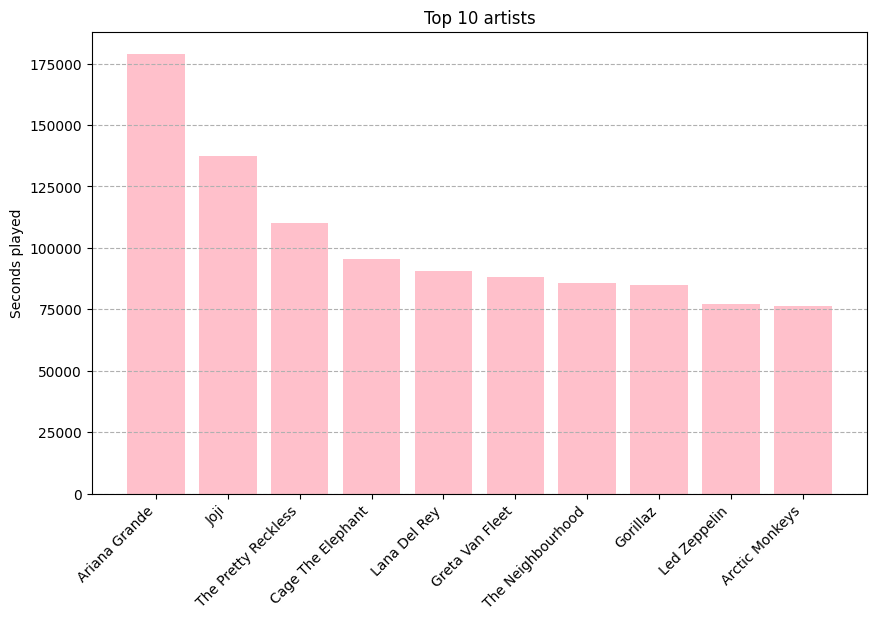

In [89]:
# Plotting top ten artists in bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_artists_df['artistName'], top_artists_df['secPlayed'], color='pink')
plt.title('Top 10 artists')
plt.ylabel('Seconds played')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

In [90]:
# Creating a new dataframe with trackName and play time 
tracks_df = df[['trackName', 'secPlayed']]

# Grouping by track name and summing play time 
tracks_df = tracks_df.groupby('trackName', as_index=False)['secPlayed'].sum()

# Finding the top ten songs 
top_tracks_df = tracks_df.sort_values(by='secPlayed', ascending=False).head(10)

top_tracks_df

,trackName,secPlayed
2122,Les,31403.364
2671,O Children,24558.414
4173,When the Levee Breaks - Remaster,22631.721
1566,Heartbeat,22056.629
149,Afterthought,21599.564
81,A Change Is Gonna Come,20414.317
487,Bones,18860.916
1161,FEEL.,18696.637
339,Bad Ones (feat. Tegan and Sara),18558.247
2264,Love It If We Made It,17018.248


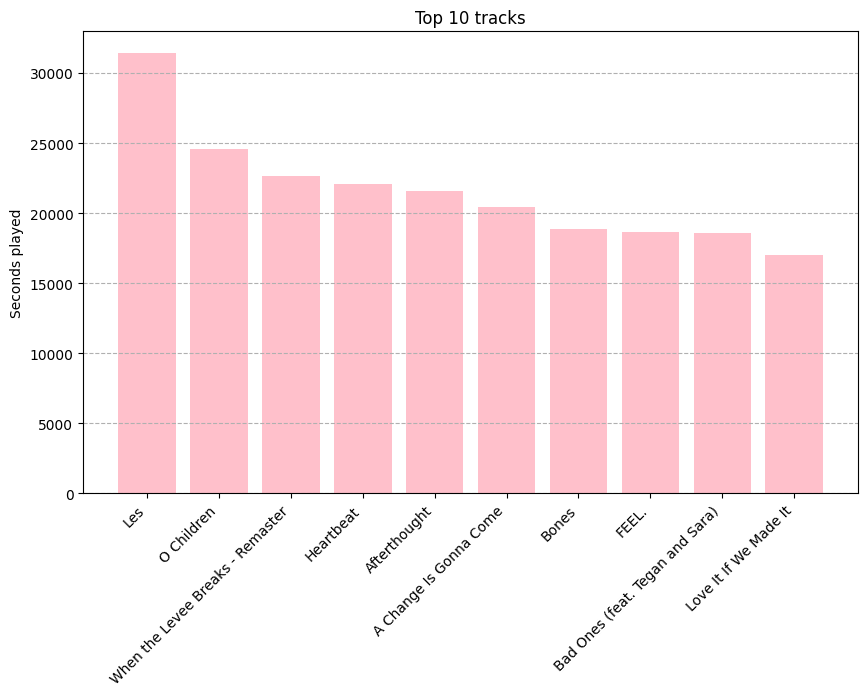

In [91]:
# Plotting top ten tracks in bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_tracks_df['trackName'], top_tracks_df['secPlayed'], color='pink')
plt.title('Top 10 tracks')
plt.ylabel('Seconds played')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

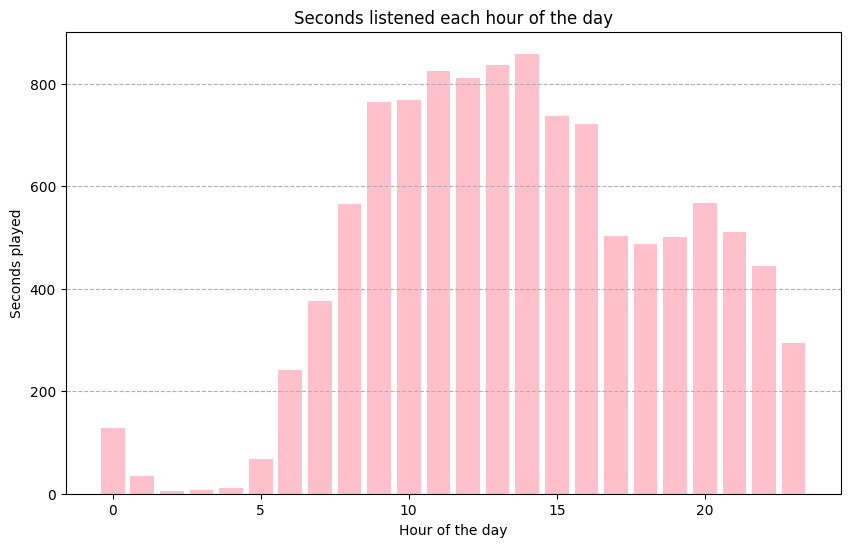

In [114]:
# Extracting the hour
df['hour'] = df['endTime'].dt.hour

# Grouping by hour and summing up seconds played 
hours_df = df.groupby('hour', as_index=False)['secPlayed'].sum()

# Finding number of days in dataset to find average amount per day
num_days = df['endTime'].dt.date.nunique()
hours_df['secPlayed'] = hours_df['secPlayed'] / num_days

plt.figure(figsize=(10, 6))
plt.bar(hours_df['hour'], hours_df['secPlayed'], color='pink')
plt.title('Seconds listened each hour of the day')
plt.ylabel('Seconds played')
plt.xlabel('Hour of the day')
plt.grid(axis='y', linestyle='--')
plt.show()

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

In [115]:
# Extracting the data containing Leonard Cohen and Rage Against The Machine
leonard_df = df[df['artistName'] == 'Leonard Cohen'].copy()
rage_df = df[df['artistName'] == 'Rage Against The Machine'].copy()

# Grouping by hour and sum up listening time
leonard_df = leonard_df.groupby('hour', as_index=False)['secPlayed'].sum()
rage_df = rage_df.groupby('hour', as_index=False)['secPlayed'].sum()

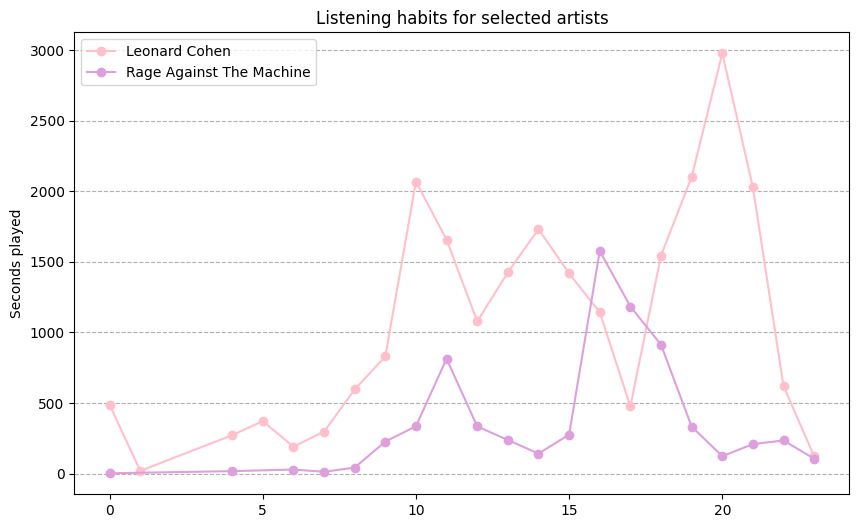

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(leonard_df['hour'], leonard_df['secPlayed'], marker='o', label='Leonard Cohen', color='pink')
plt.plot(rage_df['hour'], rage_df['secPlayed'], marker='o', label='Rage Against The Machine', color='plum')
plt.title('Listening habits for selected artists')
plt.ylabel('Seconds played')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [116]:
# Creating the column 'skipped_song'
df['skipped'] = (df['secPlayed'] < 30).astype(int) # Songs with less than 30 seconds in 'secPlayed' is set to 1, else 0 

df

,endTime,artistName,trackName,secPlayed,hour,skipped
0,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22.929,1,1
1,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12.293,1,1
2,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.325,1,1
3,2023-01-01 01:17:00,Ariana Grande,positions,0.417,1,1
4,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205,1,1
...,...,...,...,...,...,...
156534,2023-12-07 21:13:00,Lana Del Rey,Ride,1.126,21,1
156535,2023-12-07 21:13:00,Childish Gambino,Les,2.484,21,1
156536,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9.317,21,1
156537,2023-12-07 21:14:00,Ariana Grande,my hair,23.757,21,1


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

In [117]:
# Counting occurences of skipped and listened
skip_count = df['skipped'].value_counts()

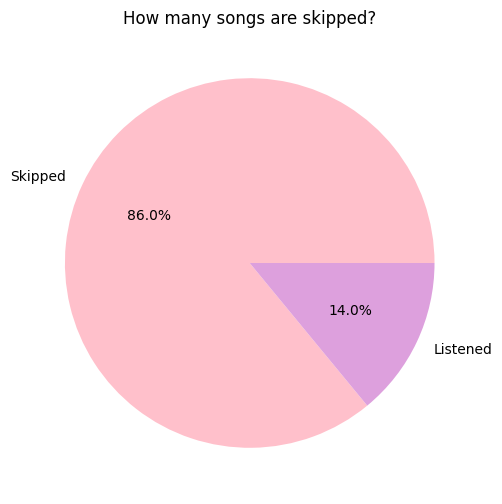

In [97]:
plt.figure(figsize=(6,6))
plt.pie(skip_count, labels=['Skipped', 'Listened'], autopct='%1.1f%%', colors=['pink', 'plum'])
plt.title('How many songs are skipped?')
plt.show()

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [98]:
# Amount of songs skipped per artist
skipped_count = df.groupby('artistName')['skipped'].sum()

# Total songs per artist
song_count = df.groupby('artistName')['skipped'].count()

# Creating new dataframe to store skiprate
df_skipped = pd.DataFrame({
    'artistName': song_count.index,
    'totalSongs': song_count.values,
    'skippedSongs': skipped_count.values,
    'skipRate': skipped_count.values / song_count.values
})

df_skipped

,artistName,totalSongs,skippedSongs,skipRate
0,10cc,28,19,0.678571
1,2Pac,513,442,0.861598
2,3 Doors Down,2,1,0.500000
3,4 Non Blondes,122,88,0.721311
4,50 Cent,28,19,0.678571
...,...,...,...,...
951,squeeda,3,2,0.666667
952,tenkousei.,37,37,1.000000
953,trxxshed,2,1,0.500000
954,xander.,8,3,0.375000


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [99]:
# Sorting the dataframe by an artists skiprate
df_sorted = df_skipped[['artistName', 'skipRate']].sort_values(by='skipRate', ascending=True, ignore_index=True)

# Printing top 3 artists
print('Top 3 artists with lowest skip-rate:')
print(f'{df_sorted.head(3).to_string(index=False, header=False)}')

Top 3 artist with lowest skip-rate:
Gloria Gaynor 0.000000
     Roc Boyz 0.111111
        LACES 0.142857


In [118]:
# Printing bottom 3 artists
print('Bottom 3 artists with highest skip-rate:')
print(f'{df_sorted.tail(3).to_string(index=False, header=False)}')

Bottom 3 artists with highest skip-rate:
         Bastille 1.0
Alexander Stewart 1.0
A Problem Squared 1.0


Several artists has 100% skip-rate, and therefore the bottom 3 artists may vary.

## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [101]:
df_ariana = df[df['artistName'] == 'Ariana Grande']

df_ariana

,endTime,artistName,trackName,secPlayed,hour,skipped
0,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22.929,1,1
1,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12.293,1,1
3,2023-01-01 01:17:00,Ariana Grande,positions,0.417,1,1
5,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487,1,1
6,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139,1,1
...,...,...,...,...,...,...
156514,2023-12-07 17:46:00,Ariana Grande,Almost Is Never Enough,28.483,17,1
156520,2023-12-07 20:51:00,Ariana Grande,needy,26.220,20,1
156527,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13.448,21,1
156532,2023-12-07 21:13:00,Ariana Grande,pete davidson,0.603,21,1


In [102]:
# For comparison
df_joji = df[df['artistName'] == 'Joji']

df_joji

,endTime,artistName,trackName,secPlayed,hour,skipped
37,2023-01-01 01:31:00,Joji,Die For You,95.062,1,0
93,2023-01-01 11:33:00,Joji,SLOW DANCING IN THE DARK,18.327,11,1
196,2023-01-01 12:31:00,Joji,Die For You,0.905,12,1
206,2023-01-01 12:32:00,Joji,Die For You,32.229,12,0
207,2023-01-01 12:32:00,Joji,Die For You,1.950,12,1
...,...,...,...,...,...,...
155911,2023-12-05 13:58:00,Joji,CAN'T GET OVER YOU (feat. Clams Casino),3.024,13,1
156249,2023-12-06 16:11:00,Joji,Afterthought,0.441,16,1
156250,2023-12-06 16:11:00,Joji,Afterthought,0.301,16,1
156395,2023-12-07 09:18:00,Joji,Die For You,16.872,9,1


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

In [103]:
# Finding Ariana Grande's skip rate and the average skip rate of the dataset
ariana_skipRate = df_skipped[df_skipped['artistName'] == 'Ariana Grande']['skipRate'].mean()
mean_skipRate = df_skipped['skipRate'].mean()

print(f"Ariana Grande's skip-rate: {ariana_skipRate * 100:.2f}%")
print(f"Average skip-rate: {mean_skipRate * 100:.2f}%")

Ariana Grande's skip-rate: 99.53%
Average skip-rate: 73.05%


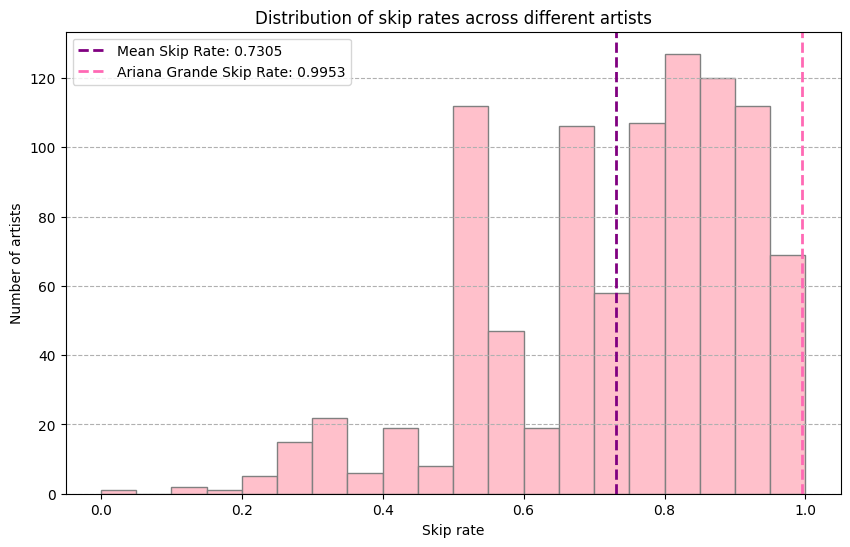

In [104]:
plt.figure(figsize=(10,6))
plt.hist(df_skipped['skipRate'], edgecolor='grey', bins=20, color='pink')
plt.axvline(mean_skipRate, color='purple', linestyle='dashed', linewidth=2, label=f'Mean Skip Rate: {mean_skipRate:.4f}')
plt.axvline(ariana_skipRate, color='hotpink', linestyle='dashed', linewidth=2, label=f'Ariana Grande Skip Rate: {ariana_skipRate:.4f}')
plt.title('Distribution of skip rates across different artists')
plt.xlabel('Skip rate')
plt.ylabel('Number of artists')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset?

    Ariana's skip rate is in the last bin of 95-100% skip rate, which shows that you skip her more than average skip rate at 73.05%!

Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?

    The amount of rows in df_ariana shows that Ariana has been played 19 337 times, so even though the skip rate is high for these plays, Ariana shows up a lot in the dataset. We also saw that Ariana has the most played seconds, if we look at how many times Joji, the second most played artist, we see that they are played "only" 3611 times in comparison. Maybe the wrapped-stats doesn't take skip rate/msPlayed into account?